In [35]:
from impala.dbapi import connect
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


from decimal import Decimal
from IPython.display import display

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 50

In [4]:
conn = connect(host = 'sbdaip01node01.vip.cbr.ru', port = 21052, auth_mechanism = 'GSSAPI', kerberos_service_name = 'impala')
conn.close()

In [5]:
zapros_first = (f"SELECT * FROM zp_dm_dmi_data.`06_price_cian`")

In [6]:
zapros_second = (f"SELECT * FROM zp_dm_dmi_data.`07_secondary`")

In [7]:
region_name ='Московская область'  
region_name_1 ='Москва'   
date = '2024-10-16'

In [8]:
zapros_first_m = (f"SELECT * FROM zp_dm_dmi_data.`06_price_cian` where geo_region = '{region_name_1}' and ptn_dadd = '{date}'")

In [9]:
zapros_first_mо = (f"SELECT * FROM zp_dm_dmi_data.`06_price_cian` where geo_region = '{region_name}' and ptn_dadd = '{date}'")

In [10]:
zapros_second_m = (f"SELECT * FROM zp_dm_dmi_data.`07_secondary` where geo_region = '{region_name_1}' and ptn_dadd = '{date}'")

In [11]:
zapros_second_mo = (f"SELECT * FROM zp_dm_dmi_data.`07_secondary` where geo_region = '{region_name}' and ptn_dadd = '{date}'")

In [12]:
df_second_m = pd.read_sql(zapros_second_m, conn)

In [13]:
df_second_mo = pd.read_sql(zapros_second_mo, conn)

In [200]:
df_2_mmo = pd.concat([df_second_m, df_second_mo])
df_2_mmo.reset_index().head()

,index,cian_id,photo,url,bargainterms_price,price_sqm,area_total,rooms_count,address,floor,floors_count,year_release,wall_type,created,last_edited,bargainterms_sale_type,bargainterms_price_start,bargainterms_price_max,bargainterms_price_min,is_by_homeowener,views,bargainterms_currency,agency_name,area_living,area_kitchen,area_rooms,repair_type,wc_combined_count,wc_separated_count,balconies_count,loggias_count,is_apartments,is_penthouse,ceilingheight,nb_developer,nb_deadline,bcomplex_id_cian,bcomplex_name_cian,nb_id_cian,nb_name_cian,bcomplex_id,bcomplex_name,bcomplex_name_eng,nb_id,nb_name,nb_is_residence,bti_chute_type,bti_drain_type,bti_electric_supply,bti_energy_type,bti_firefight_type,bti_overlap_type,bti_vent_type,bti_water_disposal,bti_flat_area_total,bti_flat_count,bti_year_built,bti_entrances,bti_heatsupplytype,bti_lifts,bti_isemergency,lat,lng,geo_federal_district,geo_region,geo_regiondistrict,geo_settlement,geo_city,geo_street,geo_house_num,geo_microdistrict,geo_city_okrug,geo_city_district,geo_gorod_atd,subway_name,subway_time,subway_travel_type,highway_name,highway_distance,railway_name,railway_distance,railway_time,railway_travel_type,description,ptn_dadd,load_end_dttm,created_y,created_m
0,0,165105530,https://images.cdn-cian.ru/images/2/896/333/kv...,https://www.cian.ru/sale/flat/165105530,7000000.0,120690.0,58.0,2-комн.,"Россия, Москва, посёлок Первомайское, Централь...",1.0,3,2010.0,Монолитный,2017-10-16,2024-09-30,free,6000000,8700000,6000000,0.0,4218.0,rur,None,30.0,12.0,None,no,1.0,0.0,0.0,0.0,0.0,NaN,None,None,NaT,NaN,None,None,None,NaN,None,None,NaN,None,None,Отсутствует,Наружные водостоки,Центральное,B,Отсутствует,Перекрытия железобетонные,Вытяжная вентиляция,Центральное,5427.6,63.0,2010.0,3.0,"Независимая (через теплообменники), двухтрубна...",0.0,0.0,55.53644,37.15491,Центральный,Москва,None,пос. Первомайское,Москва,улица Центральная,27,None,ТАО (Троицкий),None,ТАО (Троицкий),Крёкшино,9.0,transport,Киевское,23.0,Санино,7.0,87.0,byFoot,"Новая Москва"", собственность более 3х лет, без...",2024-10-16,9999-12-31 00:00:00,2017,10
1,1,164416029,https://images.cdn-cian.ru/images/1/780/333/kv...,https://www.cian.ru/sale/flat/164416029,36600000.0,389362.0,94.0,3-комн.,"Россия, Москва, Бережковская набережная, 14",3.0,6,1940.0,Кирпичный,2017-10-02,2024-10-01,alternative,37000000,37000000,36600000,0.0,5400.0,rur,Частный маклер,61.0,13.0,None,cosmetic,0.0,1.0,2.0,0.0,0.0,0.0,3.2,None,NaT,NaN,None,None,None,NaN,None,None,NaN,None,None,Отсутствует,Внутренние водостоки,Центральное,Е (Пониженный - приказ Минстроя №399/пр),Пожарные гидранты,Смешанные,Приточно-вытяжная вентиляция,Центральное,4783.0,50.0,1940.0,5.0,Центральное,5.0,0.0,55.73700,37.56317,Центральный,Москва,None,Москва,Москва,Бережковская набережная,14,None,ЗАО,Дорогомилово,ЗАО,Киевская,14.0,walk,None,NaN,Москва (Киевский вокзал),4.0,7.0,byCar,'Шикарная квартира в историческом районе Москв...,2024-10-16,9999-12-31 00:00:00,2017,10
2,2,165355018,https://images.cdn-cian.ru/images/9/588/373/kv...,https://www.cian.ru/sale/flat/165355018,14500000.0,284314.0,51.0,2-комн.,"Россия, Москва, бульвар Дмитрия Донского, 9к1",7.0,17,1992.0,Панельный,2017-10-20,2024-10-13,alternative,16000000,16000000,14500000,0.0,2238.0,rur,None,32.0,9.0,None,cosmetic,NaN,1.0,1.0,NaN,0.0,NaN,2.64,None,NaT,NaN,None,None,None,NaN,None,None,NaN,None,None,На лестничной клетке,Внутренние водостоки,Центральное,None,Автоматическая,Железобетонные,Вытяжная вентиляция,Центральное,18055.3,327.0,1991.0,5.0,Центральное,10.0,0.0,55.56851,37.57767,Центральный,Москва,None,Москва,Москва,бульвар Дмитрия Донского,9К1,None,ЮЗАО,Северное Бутово,ЮЗАО,Бульвар Дмитрия Донского,2.0,walk,Калужское,9.0,Битца,5.0,7.0,byCar,Хорошая квартира в доме серии П-44. Стеклопаке...,2024-10-16,9999-12-31 00:00:00,2017,10
3,3,222491593,https://images.cdn-cian.ru/images/1/976/328/kv...,https://www.cian.ru/sale/flat/222491593,13500000.0,299335.0,45.1,2-комн.,"Россия, Москва, Сумская улица, 6к2",5.0,0,1969.0,Панельный,2019-12-01,2

In [201]:
df_second = df_2_mmo[['cian_id', 'bargainterms_price', 'price_sqm', 'area_total', 'is_apartments', 'bargainterms_currency', 'bti_year_built', 'nb_deadline', 
                      'bcomplex_id_cian', 'bcomplex_name_cian', 'bcomplex_id', 'bcomplex_name', 'bcomplex_name_eng', 'address', 'lat', 'lng', 'geo_city', 
                      'geo_street', 'geo_house_num', 'geo_microdistrict', 'geo_city_okrug', 'geo_city_district']]
df_second.reset_index().drop(columns = 'index')

,cian_id,bargainterms_price,price_sqm,area_total,is_apartments,bargainterms_currency,bti_year_built,nb_deadline,bcomplex_id_cian,bcomplex_name_cian,bcomplex_id,bcomplex_name,bcomplex_name_eng,address,lat,lng,geo_city,geo_street,geo_house_num,geo_microdistrict,geo_city_okrug,geo_city_district
0,165105530,7000000.0,120690.0,58.0,0.0,rur,2010.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, посёлок Первомайское, Централь...",55.53644,37.15491,Москва,улица Центральная,27,None,ТАО (Троицкий),None
1,164416029,36600000.0,389362.0,94.0,0.0,rur,1940.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, Бережковская набережная, 14",55.73700,37.56317,Москва,Бережковская набережная,14,None,ЗАО,Дорогомилово
2,165355018,14500000.0,284314.0,51.0,0.0,rur,1991.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, бульвар Дмитрия Донского, 9к1",55.56851,37.57767,Москва,бульвар Дмитрия Донского,9К1,None,ЮЗАО,Северное Бутово
3,222491593,13500000.0,299335.0,45.1,0.0,rur,1969.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, Сумская улица, 6к2",55.62492,37.60660,Москва,Сумская улица,6К2,None,ЮАО,Чертаново Северное
4,223287010,10600000.0,341935.0,31.0,0.0,rur,1964.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, улица Каховка, 15к1",55.65209,37.58261,Москва,улица Каховка,15К1,None,ЮЗАО,Зюзино
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107241,289494026,9699000.0,149215.0,65.0,NaN,rur,2012.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Балашиха, Советска...",55.81679,37.95343,Балашиха,Советская улица,56,None,None,None
107242,289510294,5300000.0,170968.0,31.0,0.0,rur,1965.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Подольск, улица Ма...",55.40928,37.56799,Подольск,улица Машиностроителей,12,Южный,None,None
107243,289558274,12000000.0,127660.0,94.0,NaN,rur,1955.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Клин, улица Мира, 9/6",56.32855,36.72958,Клин,улица Мира,9/6,None,None,None
107244,290250372,3900000.0,140288.0,27.8,NaN,rur,1960.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Волоколамск, улица...",56.06556,35.92434,Волоколамск,улица Космонавтов,3,None,None,None


In [202]:
сol1 = 'lat'
col2 = 'lng'
df_second[сol1] = df_second[сol1].astype(str)
df_second[col2] = df_second[col2].astype(str)
df_second['koordinat'] = df_second[сol1].str.cat(df_second[col2], sep = ', ')
#df_copy=df.copy(df_second)
#df_copy['koordinat']=new_value
df_second

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,cian_id,bargainterms_price,price_sqm,area_total,is_apartments,bargainterms_currency,bti_year_built,nb_deadline,bcomplex_id_cian,bcomplex_name_cian,bcomplex_id,bcomplex_name,bcomplex_name_eng,address,lat,lng,geo_city,geo_street,geo_house_num,geo_microdistrict,geo_city_okrug,geo_city_district,koordinat
0,165105530,7000000.0,120690.0,58.0,0.0,rur,2010.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, посёлок Первомайское, Централь...",55.53644,37.15491,Москва,улица Центральная,27,None,ТАО (Троицкий),None,"55.53644, 37.15491"
1,164416029,36600000.0,389362.0,94.0,0.0,rur,1940.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, Бережковская набережная, 14",55.737,37.56317,Москва,Бережковская набережная,14,None,ЗАО,Дорогомилово,"55.737, 37.56317"
2,165355018,14500000.0,284314.0,51.0,0.0,rur,1991.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, бульвар Дмитрия Донского, 9к1",55.56851,37.57767,Москва,бульвар Дмитрия Донского,9К1,None,ЮЗАО,Северное Бутово,"55.56851, 37.57767"
3,222491593,13500000.0,299335.0,45.1,0.0,rur,1969.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, Сумская улица, 6к2",55.62492,37.6066,Москва,Сумская улица,6К2,None,ЮАО,Чертаново Северное,"55.62492, 37.6066"
4,223287010,10600000.0,341935.0,31.0,0.0,rur,1964.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, улица Каховка, 15к1",55.65209,37.58261,Москва,улица Каховка,15К1,None,ЮЗАО,Зюзино,"55.65209, 37.58261"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50357,289494026,9699000.0,149215.0,65.0,NaN,rur,2012.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Балашиха, Советска...",55.81679,37.95343,Балашиха,Советская улица,56,None,None,None,"55.81679, 37.95343"
50358,289510294,5300000.0,170968.0,31.0,0.0,rur,1965.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Подольск, улица Ма...",55.40928,37.56799,Подольск,улица Машиностроителей,12,Южный,None,None,"55.40928, 37.56799"
50359,289558274,12000000.0,127660.0,94.0,NaN,rur,1955.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Клин, улица Мира, 9/6",56.32855,36.72958,Клин,улица Мира,9/6,None,None,None,"56.32855, 36.72958"
50360,290250372,3900000.0,140288.0,27.8,NaN,rur,1960.0,NaT,NaN,None,NaN,None,None,"Россия, Московская область, Волоколамск, улица...",56.06556,35.92434,Волоколамск,улица Космонавтов,3,None,None,None,"56.06556, 35.92434"


In [203]:
s_1 = df_second['is_apartments'] != 1
s_2 = df_second['bargainterms_currency'] != 'usd'
s_3 = df_second['bargainterms_currency'] != 'eur'
s_4 = df_second['bti_year_built'] > 0
s_5 = df_second['price_sqm'] >= 700000

df_second_ = df_second[s_1 & s_2 & s_3 & s_4 & s_5] 
df_second_.reset_index(drop = True , inplace = True )
df_second_

,cian_id,bargainterms_price,price_sqm,area_total,is_apartments,bargainterms_currency,bti_year_built,nb_deadline,bcomplex_id_cian,bcomplex_name_cian,bcomplex_id,bcomplex_name,bcomplex_name_eng,address,lat,lng,geo_city,geo_street,geo_house_num,geo_microdistrict,geo_city_okrug,geo_city_district,koordinat
0,232658940,245000000.0,816667.0,300.0,0.0,rur,2003.0,NaT,8740.0,Остров Фантазий,NaN,None,None,"Россия, Москва, Островной проезд, 5к1",55.75895,37.44876,Москва,Островной проезд,5К1,None,ЗАО,Крылатское,"55.75895, 37.44876"
1,179176213,170000000.0,1036585.0,164.0,NaN,rur,1913.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, Староконюшенный переулок, 15",55.7459,37.59416,Москва,Староконюшенный переулок,15,None,ЦАО,Хамовники,"55.7459, 37.59416"
2,260269242,450000000.0,2250000.0,200.0,0.0,rur,2013.0,2011-07-01,8.0,Итальянский Квартал,575.0,Итальянский квартал,None,"Россия, Москва, улица Фадеева, 4А",55.77487,37.60161,Москва,улица Фадеева,4А,None,ЦАО,Тверской,"55.77487, 37.60161"
3,261477115,211600000.0,749027.0,282.5,0.0,rur,2004.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, Протопоповский переулок, 17с3",55.78205,37.63662,Москва,Протопоповский переулок,17С3,None,ЦАО,Мещанский,"55.78205, 37.63662"
4,255996080,41900000.0,715017.0,58.6,0.0,rur,1957.0,NaT,NaN,None,NaN,None,None,"Россия, Москва, улица Хамовнический Вал, 4",55.71675,37.57678,Москва,улица Хамовнический Вал,4,None,ЦАО,Хамовники,"55.71675, 37.57678"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,308563826,165000000.0,753425.0,219.0,0.0,rur,2009.0,2010-07-01,1607.0,Грюнвальд,1303.0,Грюнвальд,Мой адрес в Сколково,"Россия, Московская область, Одинцовский городс...",55.69572,37.39573,None,улица Весенняя,5с5,None,None,None,"55.69572, 37.39573"
3854,308499912,110000000.0,839695.0,131.0,0.0,rur,2014.0,2015-04-01,6568.0,Сколково Парк,1057.0,Сколково Парк,None,"Россия, Московская область, Одинцовский городс...",55.69608,37.40212,None,улица Весенняя,2к6,None,None,None,"55.69608, 37.40212"
3855,308465190,125000000.0,744048.0,168.0,0.0,rur,2009.0,2010-07-01,1607.0,Грюнвальд,1303.0,Грюнвальд,Мой адрес в Сколково,"Россия, Московская область, Одинцовский городс...",55.69453,37.39764,None,улица Весенняя,5с1,None,None,None,"55.69453, 37.39764"
3856,308185493,77000000.0,1023936.0,75.2,0.0,rur,2014.0,2015-04-01,6568.0,Сколково Парк,1057.0,Сколково Парк,None,"Россия, Московская область, Одинцовский городс...",55.69608,37.40212,None,улица Весенняя,2к6,None,None,None,"55.69608, 37.40212"


In [204]:
table_sample = df_second_.copy()

In [205]:
# table_sample = table_sample.drop_duplicates(subset = ['lat', 'lng'], keep = 'first')
# table_sample.reset_index(drop = True , inplace = True )
# len(table_sample)

# Поиск схожих объектов через расстояние Хаверсайна и схожести по FuzzyWuzzy, cosine_similarity, SequenceMatcher

In [219]:
table_sample['koordinat']

0       55.75895, 37.44876
1        55.7459, 37.59416
2       55.77487, 37.60161
3       55.78205, 37.63662
4       55.71675, 37.57678
               ...        
3853    55.69572, 37.39573
3854    55.69608, 37.40212
3855    55.69453, 37.39764
3856    55.69608, 37.40212
3857     55.8113, 37.38066
Name: koordinat, Length: 3858, dtype: object

In [220]:
koords_second = []

for i in range(len(table_sample['koordinat'])):
    try:
        lat = table_sample['koordinat'][i].split(', ')[0]
        lon = table_sample['koordinat'][i].split(', ')[1]
    except:
        lat = table_sample['koordinat'][i].split(',')[0]
        lon = table_sample['koordinat'][i].split(',')[1]
            
    koords_second.append([lat, lon])
    
table1 = pd.DataFrame(koords_second, columns = ['lat', 'lon'])
table1 = table1.astype(float)
table1['address'] = table_sample['address']
table1

,lat,lon,address
0,55.75895,37.44876,"Россия, Москва, Островной проезд, 5к1"
1,55.74590,37.59416,"Россия, Москва, Староконюшенный переулок, 15"
2,55.77487,37.60161,"Россия, Москва, улица Фадеева, 4А"
3,55.78205,37.63662,"Россия, Москва, Протопоповский переулок, 17с3"
4,55.71675,37.57678,"Россия, Москва, улица Хамовнический Вал, 4"
...,...,...,...
3853,55.69572,37.39573,"Россия, Московская область, Одинцовский городс..."
3854,55.69608,37.40212,"Россия, Московская область, Одинцовский городс..."
3855,55.69453,37.39764,"Россия, Московская область, Одинцовский городс..."
3856,55.69608,37.40212,"Россия, Московская область, Одинцовский городс..."


In [221]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat      3858 non-null   float64
 1   lon      3858 non-null   float64
 2   address  3858 non-null   object 
dtypes: float64(2), object(1)
memory usage: 90.5+ KB


In [222]:
table_elit = pd.read_excel('БД_Элитка_Москва.xlsx', sheet_name = 0)
table_elit = table_elit.dropna(subset = ['Сцепка_к'])
table_elit.reset_index(drop = True , inplace = True )
table_elit

,№,Наименование ЖК,Район города,Нименование улицы,Номер дома,Адрес,Адрес_Ya,Долгота,Широта,Сцепка_к,Тип,Статус,Видовые характеристики,Конкретика,Витрины,"Диапазон стоимости, руб./кв. м",Источник информации цен,Ссылка на сайт ЖК
0,1,ЖК «Lucky (Лаки)»,Пресненский,Костикова,4к1,"улица Костикова, 4к1, Москва",NaN,NaN,NaN,"55.761269, 37.557322",престижный+,Жилой комплекс,нет,NaN,есть,от 1 047 000 до 1 963 500,https://zhk-lucky-i.cian.ru/,https://lucky.ru/
1,2,ЖК «Lucky (Лаки)»,Пресненский,Костикова,4к2,"улица Костикова, 4к2, Москва",NaN,NaN,NaN,"55.761102, 37.556756",престижный+,Жилой комплекс,нет,NaN,есть,от 1 047 000 до 1 963 500,https://zhk-lucky-i.cian.ru/,https://lucky.ru/
2,3,ЖК «Lucky (Лаки)»,Пресненский,Костикова,4к3,"улица Костикова, 4к3, Москва",NaN,NaN,NaN,"55.761097, 37.555966",престижный+,Жилой комплекс,нет,NaN,есть,от 1 047 000 до 1 963 500,https://zhk-lucky-i.cian.ru/,https://lucky.ru/
3,4,ЖК «Lucky (Лаки)»,Пресненский,Костикова,4к4,"улица Костикова, 4к4, Москва",NaN,NaN,NaN,"55.761178, 37.555238",престижный+,Жилой комплекс,нет,NaN,есть,от 1 047 000 до 1 963 500,https://zhk-lucky-i.cian.ru/,https://lucky.ru/
4,5,ЖК «Lucky (Лаки)»,Пресненский,Костикова,4к5,"улица Костикова, 4к5, Москва",NaN,NaN,NaN,"55.761512, 37.555616",престижный+,Жилой комплекс,нет,NaN,есть,от 1 047 000 до 1 963 500,https://zhk-lucky-i.cian.ru/,https://lucky.ru/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,405,Московский Дом композиторов,Тверской,Брюсов,8-10с2,"Брюсов переулок, 8-10с2, Москва",NaN,NaN,NaN,"55.759289, 37.609047",престижный,Жилой комплекс,нет,NaN,нет,1814224,https://www.cian.ru/dom/moskva-pereulok-bryuso...,-
405,406,ЖК «Респект»,Пресненский,Большой Гнездниковский,3,"Большой Гнездниковский переулок, 3, Москва",NaN,NaN,NaN,"55.761720, 37.604592",престижный+,Жилой комплекс,нет,NaN,нет,1562500,https://zhk-respekt-i.cian.ru/,https://moskvadeluxe.ru/zhk-respekt-bolshoj-gn...
406,407,ЖК «Рахманинов»,Пресненский,Малый Кисловский,3,"Малый Кисловский переулок, 3, Москва",NaN,NaN,NaN,"55.754512, 37.602696",престижный+,Жилой комплекс,нет,NaN,нет,1625930,https://dom-rahmaninov.ru/,https://dom-rahmaninov.ru/
407,408,ЖК «Дом со Львами»,Арбат,Малая Молчановка,8с1,"улица Малая Молчановка, 8с1, Москва",NaN,NaN,NaN,"55.753990, 37.592635",престижный+,Жилой комплекс,нет,NaN,нет,от 1 638 889 до 1 800 000,https://www.cian.ru/cat.php?deal_type=sale&eng...,https://homehunter.ru/moscow/complex/dom-so-lvami


In [223]:
table_elit['Сцепка_к']

0      55.761269, 37.557322
1      55.761102, 37.556756
2      55.761097, 37.555966
3      55.761178, 37.555238
4      55.761512, 37.555616
               ...         
404    55.759289, 37.609047
405    55.761720, 37.604592
406    55.754512, 37.602696
407    55.753990, 37.592635
408    55.765412, 37.591773
Name: Сцепка_к, Length: 409, dtype: object

In [228]:
koords_elit = []

for i in range(len(table_elit['Сцепка_к'])):
    try:
        lat = table_elit['Сцепка_к'][i].split(', ')[0]
        lon = table_elit['Сцепка_к'][i].split(', ')[1]
    except:
        lat = table_elit['Сцепка_к'][i].split(',')[0]
        lon = table_elit['Сцепка_к'][i].split(',')[1]
            
    koords_elit.append([lat, lon])
    
table2 = pd.DataFrame(koords_elit, columns = ['lat', 'lon'])
table2 = table2.astype(float)
table2['address'] = table_elit['Адрес']
table2

,lat,lon,address
0,55.761269,37.557322,"улица Костикова, 4к1, Москва"
1,55.761102,37.556756,"улица Костикова, 4к2, Москва"
2,55.761097,37.555966,"улица Костикова, 4к3, Москва"
3,55.761178,37.555238,"улица Костикова, 4к4, Москва"
4,55.761512,37.555616,"улица Костикова, 4к5, Москва"
...,...,...,...
404,55.759289,37.609047,"Брюсов переулок, 8-10с2, Москва"
405,55.761720,37.604592,"Большой Гнездниковский переулок, 3, Москва"
406,55.754512,37.602696,"Малый Кисловский переулок, 3, Москва"
407,55.753990,37.592635,"улица Малая Молчановка, 8с1, Москва"


In [229]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat      409 non-null    float64
 1   lon      409 non-null    float64
 2   address  409 non-null    object 
dtypes: float64(2), object(1)
memory usage: 9.7+ KB


In [230]:
from sklearn.metrics.pairwise import haversine_distances

def calculate_distance(lat1, lon1, lat2, lon2):
    # Преобразуем градусы в радианы
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Создаем массив для координат
    coords_1 = np.array([[lat1_rad, lon1_rad]])
    coords_2 = np.array([[lat2_rad, lon2_rad]])
    
    # Вычисляем расстояние
    return haversine_distances(coords_1, coords_2) * 6371000  # Умножаем на радиус Земли в метрах

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_similar_objects(row1, table2):
    plt.figure(figsize = (10, 8))
    
    # Плотность объектов из таблицы 2
    plt.scatter(table2['lon'], table2['lat'], color = 'blue', label = 'Элитное жилье', alpha = 0.5)

    # Объект из таблицы 1
    plt.scatter(row1['lon'], row1['lat'], color = 'red', label = 'Объект из таблицы 1', s = 100)

    # Схожие объекты
    for index in row1['similar_indices']:
        plt.scatter(table2.iloc[index]['lon'], table2.iloc[index]['lat'], color = 'green', label = 'Схожий объект', alpha = 0.7)

    plt.title('Схожие объекты')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.legend()
    plt.grid()
    plt.show()

In [275]:
from tqdm import tqdm
from fuzzywuzzy import fuzz
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib

# Создаем новый столбец для хранения индексов схожих объектов
table1['similar_indices'] = [[] for _ in range(len(table1))]
table1['distance'] = [[] for _ in range(len(table1))]
# Для сравнения адресов
table1['address_ratio'] = [[] for _ in range(len(table1))]
table1['address_partial_ratio'] = [[] for _ in range(len(table1))]
table1['address_token_sort_ratio'] = [[] for _ in range(len(table1))]
table1['address_token_set_ratio'] = [[] for _ in range(len(table1))]
table1['address_SeqMatcher_ratio'] = [[] for _ in range(len(table1))]
table1['address_cosine_sim'] = [[] for _ in range(len(table1))]

# Определяем порог расстояния (в метрах)
distance_threshold = 80 #26

# Вычисляем расстояния и заполняем столбец
for i, row1 in tqdm(table1.iterrows(), total = table1.shape[0], position = 0):
    for j, row2 in table2.iterrows():
        distance = calculate_distance(row1['lat'], row1['lon'], row2['lat'], row2['lon'])
        if distance < distance_threshold:
            
            ratio = fuzz.ratio(table1['address'][i], table2['address'][j])                         # простой алгоритм схожести
            partial_ratio = fuzz.partial_ratio(table1['address'][i], table2['address'][j])         # хорошо ищет, когда в адресе есть пропуски (наилучш. частич. совпадение)
            token_sort_ratio = fuzz.token_sort_ratio(table1['address'][i], table2['address'][j])   # разбивает на токены, сортирует, хорош когда есть перестановка слов
            token_set_ratio = fuzz.token_set_ratio(table1['address'][i], table2['address'][j])     # аналогичен предыдущему, но игнорирует дубли токенов
            
            SequenceMatcher_ratio = difflib.SequenceMatcher(None, table1['address'][i].lower(), table2['address'][j].lower()).ratio() # схожесть последовательностей
            
            vectorizer = TfidfVectorizer()
            tfidf_matrix = vectorizer.fit_transform([table1['address'][i], table2['address'][j]])   # косинусное сходство между векторами
            cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
                     
            table1.at[i, 'similar_indices'].append(j)
            table1.at[i, 'distance'].append(round(distance[0][0], 1))
            table1.at[i, 'address_ratio'].append(ratio)
            table1.at[i, 'address_partial_ratio'].append(partial_ratio)
            table1.at[i, 'address_token_sort_ratio'].append(token_sort_ratio)
            table1.at[i, 'address_token_set_ratio'].append(token_set_ratio)
            table1.at[i, 'address_SeqMatcher_ratio'].append(round(SequenceMatcher_ratio, 2))
            table1.at[i, 'address_cosine_sim'].append(round(cosine_sim, 2))

100%|██████████| 3858/3858 [04:36<00:00, 13.94it/s]


In [277]:
table1

,lat,lon,address,similar_indices,distance,address_ratio,address_partial_ratio,address_token_sort_ratio,address_token_set_ratio,address_SeqMatcher_ratio,address_cosine_sim
0,55.75895,37.44876,"Россия, Москва, Островной проезд, 5к1","[116, 118, 119, 130, 131, 132, 133]","[73.6, 1.1, 72.2, 74.0, 48.5, 73.3, 75.2]","[59, 64, 59, 58, 61, 58, 58]","[79, 84, 79, 76, 80, 76, 76]","[81, 89, 81, 82, 85, 82, 82]","[96, 100, 96, 92, 92, 92, 92]","[0.59, 0.64, 0.59, 0.58, 0.61, 0.58, 0.58]","[0.66, 0.82, 0.66, 0.51, 0.51, 0.51, 0.51]"
1,55.74590,37.59416,"Россия, Москва, Староконюшенный переулок, 15",[],[],[],[],[],[],[],[]
2,55.77487,37.60161,"Россия, Москва, улица Фадеева, 4А",[354],[0.2],[59],[81],[87],[100],[0.59],[0.82]
3,55.78205,37.63662,"Россия, Москва, Протопоповский переулок, 17с3",[],[],[],[],[],[],[],[]
4,55.71675,37.57678,"Россия, Москва, улица Хамовнический Вал, 4",[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
3853,55.69572,37.39573,"Россия, Московская область, Одинцовский городс...",[],[],[],[],[],[],[],[]
3854,55.69608,37.40212,"Россия, Московская область, Одинцовский городс...",[],[],[],[],[],[],[],[]
3855,55.69453,37.39764,"Россия, Московская область, Одинцовский городс...",[],[],[],[],[],[],[],[]
3856,55.69608,37.40212,"Россия, Московская область, Одинцовский городс...",[],[],[],[],[],[],[],[]


In [286]:
filtered_data = table1[table1['similar_indices'].apply(lambda x: len(x) > 0)]
filtered_data = filtered_data[filtered_data['address_token_set_ratio'].apply(lambda x: x[0] > 83)]
filtered_data.reset_index(drop = True , inplace = True )
filtered_data

,lat,lon,address,similar_indices,distance,address_ratio,address_partial_ratio,address_token_sort_ratio,address_token_set_ratio,address_SeqMatcher_ratio,address_cosine_sim
0,55.75895,37.44876,"Россия, Москва, Островной проезд, 5к1","[116, 118, 119, 130, 131, 132, 133]","[73.6, 1.1, 72.2, 74.0, 48.5, 73.3, 75.2]","[59, 64, 59, 58, 61, 58, 58]","[79, 84, 79, 76, 80, 76, 76]","[81, 89, 81, 82, 85, 82, 82]","[96, 100, 96, 92, 92, 92, 92]","[0.59, 0.64, 0.59, 0.58, 0.61, 0.58, 0.58]","[0.66, 0.82, 0.66, 0.51, 0.51, 0.51, 0.51]"
1,55.77487,37.60161,"Россия, Москва, улица Фадеева, 4А",[354],[0.2],[59],[81],[87],[100],[0.59],[0.82]
2,55.77487,37.60161,"Россия, Москва, улица Фадеева, 4А",[354],[0.2],[59],[81],[87],[100],[0.59],[0.82]
3,55.74221,37.63376,"Россия, Москва, Большая Татарская улица, 7к1","[391, 392]","[6.7, 59.1]","[70, 68]","[88, 84]","[91, 88]","[100, 94]","[0.7, 0.68]","[0.85, 0.58]"
4,55.75929,37.60905,"Россия, Москва, Брюсов переулок, 8-10с2",[404],[0.2],[66],[85],[89],[100],[0.66],[0.82]
...,...,...,...,...,...,...,...,...,...,...,...
1701,55.74076,37.58105,"Россия, Москва, 1-й Неопалимовский переулок, 8",[145],[0.6],[71],[88],[91],[100],[0.71],[0.78]
1702,55.79848,37.52067,"Россия, Москва, Чапаевский переулок, 3",[360],[0.8],[65],[85],[89],[100],[0.65],[0.78]
1703,55.75986,37.61055,"Россия, Москва, Тверская улица, 9",[403],[0.5],[59],[81],[87],[100],[0.59],[0.78]
1704,55.71451,37.47470,"Россия, Москва, Нежинская улица, 5к2",[78],[0.5],[62],[83],[88],[100],[0.62],[0.82]


In [285]:
# filtered_data = filtered_data[filtered_data['address_token_set_ratio'].apply(lambda x: (x[0] >= 80) & (x[0] < 90))]
# filtered_data.reset_index(drop = True , inplace = True )
# filtered_data

In [287]:
# Выбор первого объекта и его похожих объектов
first_object_index = 666
similar_indices = filtered_data['similar_indices'][first_object_index]

# Создание новой таблицы с похожими объектами
similar_objects_df = table2.iloc[similar_indices].copy()

# Вывод информации
print("Первый объект:")
print(filtered_data.iloc[first_object_index])
print("\nПохожие объекты:")
print(similar_objects_df)

Первый объект:
lat                                                        55.75727
lon                                                        37.64973
address                     Россия, Москва, Казарменный переулок, 3
similar_indices                                               [400]
distance                                                      [0.8]
address_ratio                                                  [66]
address_partial_ratio                                          [85]
address_token_sort_ratio                                       [89]
address_token_set_ratio                                       [100]
address_SeqMatcher_ratio                                     [0.66]
address_cosine_sim                                           [0.78]
Name: 666, dtype: object

Похожие объекты:
           lat        lon                          address
400  55.757273  37.649741  Казарменный переулок, 3, Москва


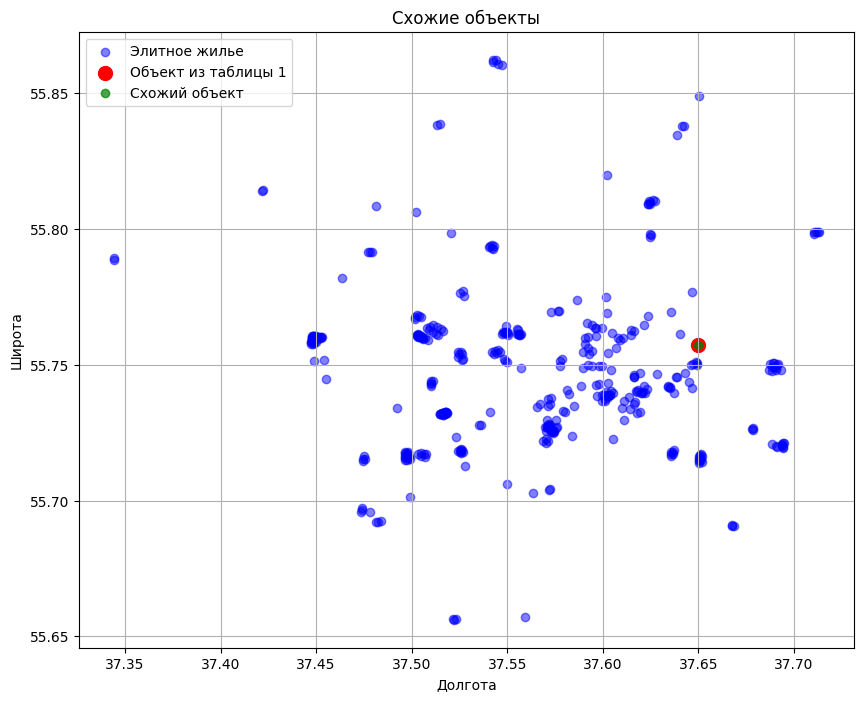

In [294]:
# Визуализируем для первого объекта из таблицы 1
plot_similar_objects(filtered_data.iloc[666], table2)

# Сравнение разницы координат

In [ ]:
from tqdm import tqdm

# Подготовка данных
## Переименование столбцов
df['lat'] = df['Долгота']
df['lng'] = df['Широта']
df['address'] = df['Адрес']

df1 = pd.DataFrame(df_second)
df2 = pd.DataFrame(df)

# Подготовка координат
coords1 = df1[['lat', 'lng']].values
coords2 = df2[['lat', 'lng']].values

# Преобразование столбцов lat и lng в числовые занчения
df1['lat'] = pd.to_numeric(df1['lat'], errors = 'coerce')
df1['lng'] = pd.to_numeric(df1['lng'], errors = 'coerce')
df2['lat'] = pd.to_numeric(df2['lat'], errors = 'coerce')
df2['lng'] = pd.to_numeric(df2['lng'], errors = 'coerce')

# Удаление строк с NaN
df1.dropna(subset = ['lat', 'lng'], inplace = True)
df2.dropna(subset = ['lat', 'lng'], inplace = True)

# Установка порога для сравнения координат
threshold = 0.0002

# Создание списка для хранения совпадений
matches = []

# Сравнение координат
for index1, row1 in tqdm(df1.iterrows(), total = df1.shape[0], position = 0):
    for index2, row2 in df2.iterrows():
        if (abs(row1['lat'] - row2['lat']) <= threshold) and (abs(row1['lng'] - row2['lng']) <= threshold):
            matches.append({
                            'address1_df1': row1['address'],
                            'lat_df1': row1['lat'],
                            'lng_df1': row1['lng'],
                            'address1_df2': row2['address'],
                            'lat_df2': row2['lat'],
                            'lng_df2': row2['lng'],
                           })

            # Преобразование списка совпадений в DataFrame
matches_df = pd.DataFrame(matches)
pd.set_option('display.max_rows', None)
matches_df